# **Análisis de Relación entre Superficie y Población utilizando API REST Countries**




# **Motivación:**
Comprender patrones demográficos globales es clave para la planificación estratégica, análisis de mercados y toma de decisiones económicas.


# **Audiencia:**
Este análisis está orientado a perfiles ejecutivos, analistas de datos y tomadores de decisión interesados en comprender la relación entre variables territoriales y demográficas.

# **Objetivos**:

Obtener datos desde una API pública (REST Countries).

Guardar los datos crudos en un archivo local (CSV).

Limpiar y transformar los datos para analizarlos.

Explorar la distribución de población y superficie.

Evaluar si existe relación entre superficie territorial y población.

# **Hipótesis**:

Los países con mayor superficie tienden a tener mayor población.

La relación entre superficie y población no es perfectamente lineal (hay mucha dispersión).

Existen outliers (países muy poblados con poca superficie o países muy grandes con poca población).

# **Preguntas de interés**

¿Cómo se distribuye la población entre los países?

¿Cómo se distribuye la superficie territorial?

¿Existe relación entre superficie y población?

¿Qué regiones presentan mayores valores demográficos?


# Variables utilizadas:

country (categórica)

region (categórica)

population (numérica)

area (numérica)

# Visualización:

Histograma de population (distribución de población).

Histograma de area (distribución de superficie).

Scatter plot area vs population (relación entre variables).



In [20]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
import requests

url = "https://restcountries.com/v3.1/all?fields=name,population,area,region"

response = requests.get(url)

print(response.status_code)


200


In [22]:
data = response.json()

print(type(data))
print("Cantidad de países:", len(data))


<class 'list'>
Cantidad de países: 250


In [23]:
rows = []

for country in data:
    rows.append({
        "country": country["name"]["common"],
        "region": country.get("region"),
        "population": country.get("population"),
        "area": country.get("area")
    })

df = pd.DataFrame(rows)

df.head()


,country,region,population,area
0,Vatican City,Europe,882,0.49
1,Belgium,Europe,11825551,30528.00
2,Comoros,Africa,919901,1862.00
3,Puerto Rico,Americas,3203295,8870.00
4,United States Minor Outlying Islands,Americas,0,34.20


In [24]:
df.to_csv("countries_raw.csv", index=False)

print("Archivo countries_raw.csv guardado correctamente")


Archivo countries_raw.csv guardado correctamente


# **Data Wrangling**

En esta sección se realiza la limpieza y preparación de los datos obtenidos desde la API, eliminando valores faltantes y verificando la estructura del dataset antes del análisis exploratorio.

In [25]:
df.isnull().sum()


,0
country,0
region,0
population,0
area,0


In [26]:
df = df.dropna(subset=["population", "area"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     250 non-null    object 
 1   region      250 non-null    object 
 2   population  250 non-null    int64  
 3   area        250 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


# **Resumen de metadata**

Observaciones: 250 países

Variables: 4

Variables categóricas: country, region

Variables numéricas: population, area

In [27]:
print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
df.dtypes


Cantidad de filas: 250
Cantidad de columnas: 4


,0
country,object
region,object
population,int64
area,float64


In [28]:
df.describe()


,population,area
count,2.500000e+02,2.500000e+02
mean,3.207798e+07,6.010389e+05
std,1.319655e+08,1.912575e+06
min,0.000000e+00,4.900000e-01
25%,2.233542e+05,1.194250e+03
50%,5.279123e+06,6.492950e+04
75%,2.037166e+07,3.841505e+05
max,1.417492e+09,1.709825e+07


# **Análisis Exploratorio (EDA)**

En esta sección se analizará la distribución de las variables principales y la relación entre superficie y población mediante visualizaciones estadísticas.

A continuación, se desarrollan visualizaciones que permiten responder las preguntas planteadas y evaluar las hipótesis formuladas inicialmente.

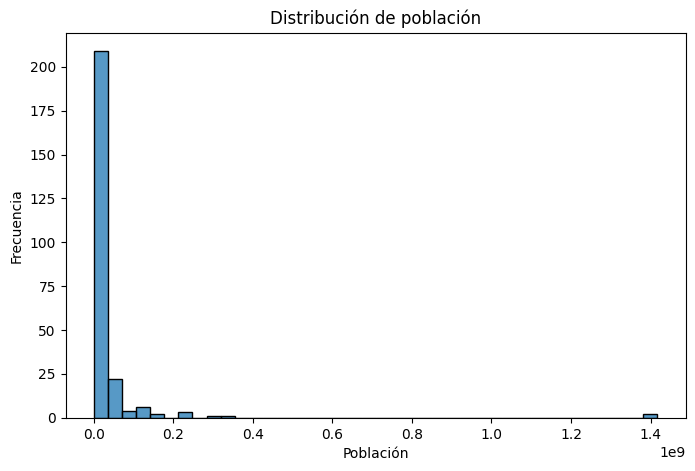

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df["population"], bins=40)
plt.title("Distribución de población")
plt.xlabel("Población")
plt.ylabel("Frecuencia")
plt.show()


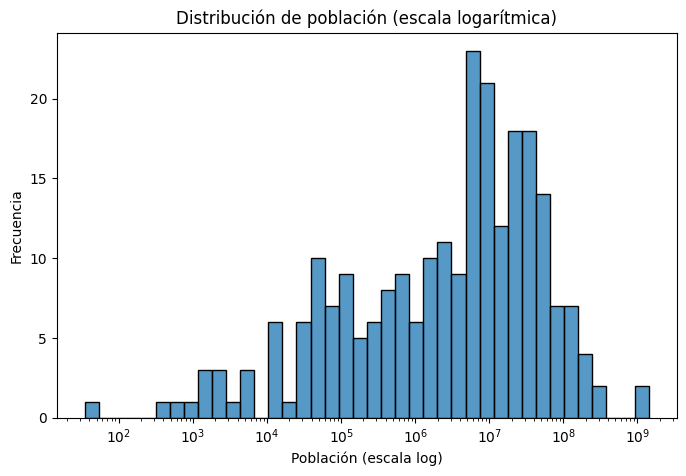

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df["population"], bins=40, log_scale=True)
plt.title("Distribución de población (escala logarítmica)")
plt.xlabel("Población (escala log)")
plt.ylabel("Frecuencia")
plt.show()


# Interpretación

La distribución de población presenta una fuerte asimetría positiva, con pocos países que concentran poblaciones extremadamente altas.
Al aplicar una escala logarítmica, se observa una distribución más equilibrada, lo que confirma la presencia de outliers que distorsionan la visualización en escala lineal.

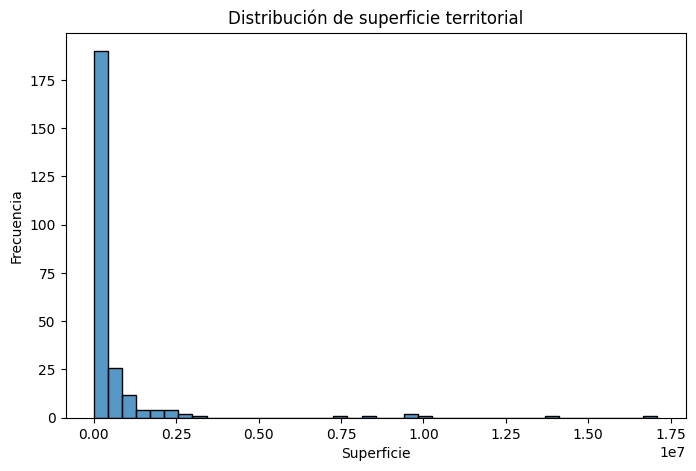

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df["area"], bins=40)
plt.title("Distribución de superficie territorial")
plt.xlabel("Superficie")
plt.ylabel("Frecuencia")
plt.show()


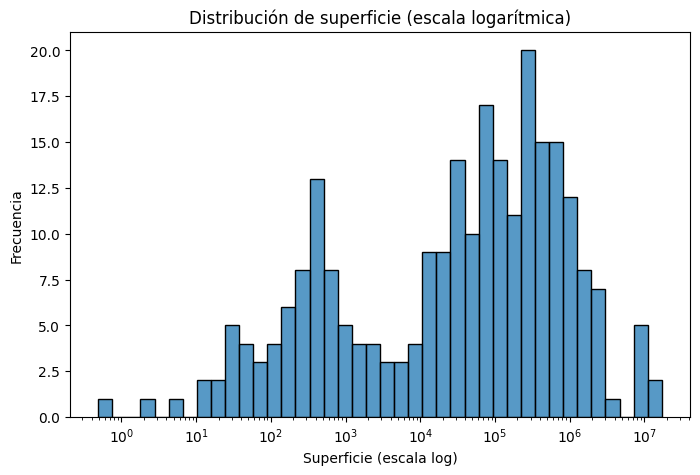

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df["area"], bins=40, log_scale=True)
plt.title("Distribución de superficie (escala logarítmica)")
plt.xlabel("Superficie (escala log)")
plt.ylabel("Frecuencia")
plt.show()


# **Interpretación**

La superficie territorial también presenta una fuerte asimetría en escala lineal, con pocos países extremadamente extensos.
Al aplicar escala logarítmica, la distribución se vuelve más homogénea, evidenciando que la mayoría de los países se concentran en rangos medios y bajos de superficie.

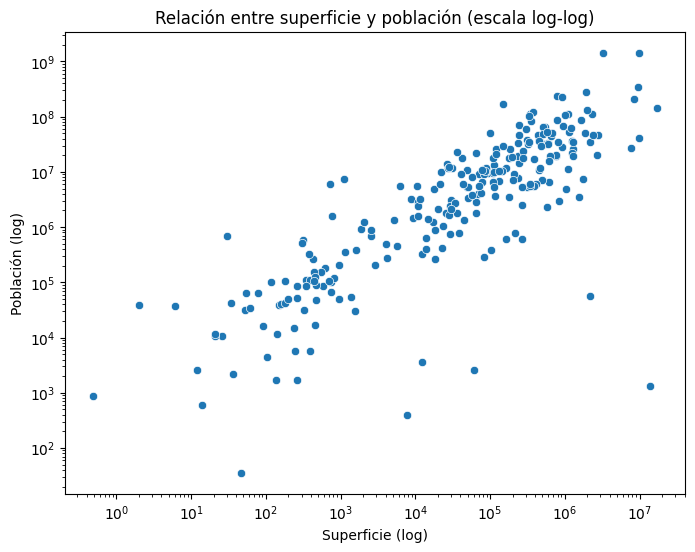

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="area", y="population", data=df)
plt.xscale("log")
plt.yscale("log")
plt.title("Relación entre superficie y población (escala log-log)")
plt.xlabel("Superficie (log)")
plt.ylabel("Población (log)")
plt.show()


In [34]:
df[["area", "population"]].corr()


,area,population
area,1.000000,0.402275
population,0.402275,1.000000


# **Análisis de correlación**

Al aplicar escala logarítmica en ambos ejes se observa una relación aproximadamente lineal entre superficie y población. Esto respalda la existencia de una correlación positiva moderada (≈ 0.40), indicando que países más grandes tienden a tener mayor población, aunque la superficie no es un factor determinante absoluto.

In [35]:
region_summary = df.groupby("region").agg({
    "population": "mean",
    "area": "mean"
}).reset_index()

region_summary


,region,population,area
0,Africa,2.478753e+07,5.139090e+05
1,Americas,1.861750e+07,7.541139e+05
2,Antarctic,3.400000e+02,2.802422e+06
3,Asia,9.449464e+07,6.410634e+05
4,Europe,1.399355e+07,4.364101e+05
5,Oceania,1.779988e+06,3.153216e+05


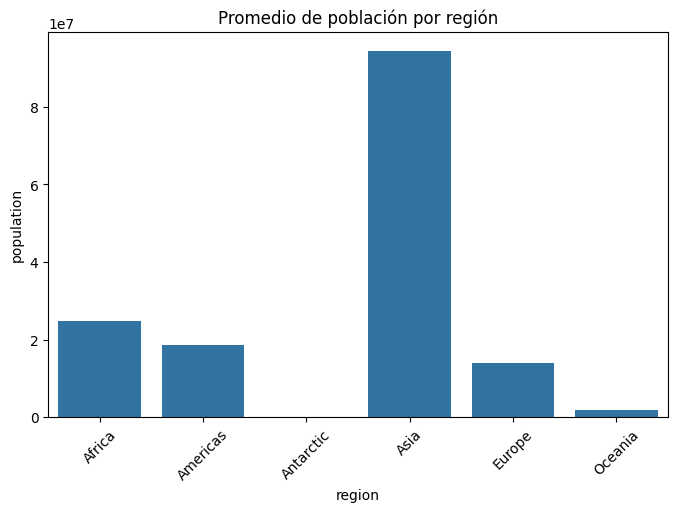

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="region", y="population", data=region_summary)
plt.title("Promedio de población por región")
plt.xticks(rotation=45)
plt.show()


Según el grafico anterior, Asia presenta el mayor promedio poblacional por país, lo que sugiere una fuerte concentración demográfica en la región. África y América muestran valores intermedios, mientras que Oceanía presenta los niveles más bajos. Esto refuerza la hipótesis de que la distribución poblacional global no es homogénea entre regiones.

# **Insights finales**

La distribución de población y superficie evidencia una fuerte asimetría global: pocos países concentran valores extremadamente altos, mientras que la mayoría presenta magnitudes considerablemente menores.

El coeficiente de correlación (≈ 0.40) indica que existe una relación positiva moderada entre superficie y población; sin embargo, el tamaño territorial no resulta un factor determinante para explicar por sí solo la magnitud demográfica de un país.

Al analizar el promedio poblacional por región, Asia muestra valores significativamente superiores al resto, reflejando una concentración demográfica estratégica a nivel global.

Estos resultados sugieren que variables adicionales como ser,  desarrollo económico, densidad urbana, estructura productiva o políticas públicas, podrían desempeñar un rol más relevante que la superficie territorial en la explicación de la distribución poblacional.

# **Limitaciones del análisis**

El presente análisis se basa exclusivamente en variables estructurales básicas (superficie y población). No se consideran factores socioeconómicos, históricos ni políticos que podrían influir significativamente en la distribución demográfica.

Asimismo, la presencia de valores extremos (outliers) genera alta dispersión en escala lineal, motivo por el cual fue necesario utilizar escala logarítmica para visualizar con mayor claridad la relación entre variables.

## Conclusiones preliminares


Se confirmó una relación positiva moderada entre superficie y población.

La distribución presenta fuerte asimetría.

Existen outliers significativos.

La superficie no es determinante absoluta.

En la siguiente etapa se incorporarán variables socioeconómicas para modelar mejor la explicación demográfica.

# **Próximos pasos (Trabajo Final)**

En la instancia final del proyecto se buscará:

Incorporar variables adicionales (PIB, densidad poblacional u otros indicadores económicos).

Evaluar modelos de Machine Learning para predecir población en función de múltiples variables.

Analizar la importancia relativa de cada variable en la predicción y mejorar la capacidad explicativa del modelo.